# Visualizing the Palisades and Eaton Fires
Mapping fires with true color and false color imagery and visualizing its impacts socioeconomically. 
 
### Author: Isabella Segarra 
[Link to Github repository](https://github.com/IsabellaSegarra/eds220-hwk4)

### Objective:
In January 2025, the Eaton and Palisades fires erupted in the foothills of Los Angeles county, devasting the region and displacing thousands. In this project, I integrated data from Landsat Collection 2 Level-2 atmospherically corrected surface reflactance data. This data has already been clipped to the area of the fire perimeters. This data is used to visualize the burn scars left from the Eaton and Palisades fire and is utilized with the fire perimeter data. 

### About the data:
#### Fire Perimeter Data 
[Fire permimeter data](https://hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about) is from the county of Los Angeles via ArcGIS.  

#### Landsat 8 Data
Landsat data is an `xarray.Dataset` from [Microsoft Planetary Computer](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2).

#### EJI Data
[Environmental Justice Index](https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html) data is a geodatabase from the CDC/ATSDR ranks U.S. census tracts. 

### Analysis:
**What you will learn in this analysis:**
1. Wrangling `netCdf4` datasets with `rioxarray`.
2. Mapping geospatial vector data with raster data. 
3. Data visualization arguments within `.imshow()`.
4. Joining geospatial data. 
5. Spatial joins and clipping. 




### 1. Import libraries
The first step in processing data is to import the necesary libraries. At a minumum, you need to always import libraries for data importing, wrangling/cleaning, and visualizing. 

In [1]:
# Environment set-up 
import pandas as pd # for data wrangling
import numpy as np  # for data wrangling 
import geopandas as gpd # for geospatial data 
import os # for data import
import matplotlib.pyplot as plt  # for visualizations 
import xarray as xr # for Netcdf4 data 
import rioxarray as rio # for xarray data 

### 2. Data Import
In this section, I will import the fire perimeter, landsat, and EJI data. These files are stored in the 'data' folder of this repository. 

In [2]:
# Import fire perimeter data
# Eaton fire >>>
fp_eaton = os.path.join('data', 'Eaton_Perimeter_20250121') # use 'os' to specify file path 
eaton_perim = gpd.read_file(fp_eaton) # use 'gpd' to read in geospatial data with geopandas 
# Palisades fire >>>
fp_palisades = os.path.join('data','Palisades_Perimeter_20250121') # use 'os' to specify file path 
palisades_perim = gpd.read_file(fp_palisades) # use 'gpd' to read in geospatial data with geopandas

The following data import is different than the data import for the fire perimeter data because the `landsat` data is a `netCDf4`. 

In [3]:
# Import Landsat data 
landsat = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

In [4]:
# Import EJI data 
# Define file path
fp_eji = os.path.join('data', 'EJI_2024_California', 'EJI_2024_California.gdb')
# Open up file with gpd
eji_ca = gpd.read_file(fp_eji) 

### 3. Fire perimeter data exploration 
In this section I will do some preliminary exploration of the fire data. Since this is geospatial data, I will do the following:
- check the *CRS* of each dataset 
- check if the data is projected 
- check if the data is multipolygon or polygon 


In [5]:
# Eaton fire perimeter

print('CRS:', eaton_perim.crs) 
print('Is geographic?:', eaton_perim.crs.is_geographic)
print('Is projected?:', eaton_perim.crs.is_projected)
print('Is geometry polygon?:', eaton_perim.geom_type)

CRS: EPSG:3857
Is geographic?: False
Is projected?: True
Is geometry polygon?: 0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
5     Polygon
6     Polygon
7     Polygon
8     Polygon
9     Polygon
10    Polygon
11    Polygon
12    Polygon
13    Polygon
14    Polygon
15    Polygon
16    Polygon
17    Polygon
18    Polygon
19    Polygon
dtype: object


In [6]:
# Palisades fire perimeter
print('CRS:', palisades_perim.crs)
print('Is geographic?:', palisades_perim.crs.is_geographic)
print('Is projected?:', palisades_perim.crs.is_projected)
print('Is geometry polygon?:', palisades_perim.geom_type)

CRS: EPSG:3857
Is geographic?: False
Is projected?: True
Is geometry polygon?: 0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
5     Polygon
6     Polygon
7     Polygon
8     Polygon
9     Polygon
10    Polygon
11    Polygon
12    Polygon
13    Polygon
14    Polygon
15    Polygon
16    Polygon
17    Polygon
18    Polygon
19    Polygon
20    Polygon
dtype: object


Although both datasets come from the same origin, it is best practice to check that their CRS's match. This `assert` function will rase a *warning* if the CRS of Eaton and Palisades fire do not match. 

In [7]:
# Assert that the CRSs match 
assert eaton_perim.crs == palisades_perim.crs

**Exploration Findings**

From my preliminary exploration, I see that both datasets have matching coordinate refrence systems, are both projected, and all have polygon geometries. 

### 4. Landsat data exploration 
In this section I will do some preliminary exploration of the landsat data. I will do the following:
- view the attributes, dimensions, and variables of the data
- check the CRS of the data


In [ ]:
# View the variables, attributes, and dimensions of the data
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [9]:
# Print the landsat CRS 
print(landsat.rio.crs)

None


**Exploration findings**

The `landsat` data contains coordinates (x,y) with time (z). The variables correspond to wavelengths red, green, blue, near infared (nir), short wave infared(swir22), and a spatial refrence variable with information relating to the cooordinate refrence system and datum. The CRS of the dataset is not directly accessibly through `rio.crs`. Through accessing the 'spatial_ref' variable, I learned that the CRS for this dataset is 32611, which does not match the Eaton and Palisades fire perimeters' CRS. 

### 5.  Restoring geospatial information
Since the CRS of the `landsat` data is stored the 'spatial_ref' variable, in order to proceed with mapping the data, I need to restore the geospatial information. By storing the geospatial informaiton in a variable, this reduces the size and processing time of the `landsat` data.

In [10]:
# View the landsat crs by accessing it through the spatial_ref attribute. Store this variable.
landsat_crs = landsat.spatial_ref.crs_wkt
landsat_crs

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

Now I will use `rio.write_crs()` to recover the geospatial information from the stored `landsat_crs` variable.

In [11]:
# Recover geospatial information 
landsat = landsat.rio.write_crs(landsat_crs, inplace=True) # recover the CRS from the spatial_ref  

# Confirm CRS 
print(landsat.rio.crs)

EPSG:32611


### 6. True color image

In this section, I created two maps that display true color imagery, one with less specifications and one with the correct specifications. True color imagery displays colors within the light spectrum that humans can see (i.e., red, green, blue). When these three bands are used in combination, a full-color image emerges. In order to map the Landsat data with true colors, I need to access the red, green, and blue bands.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


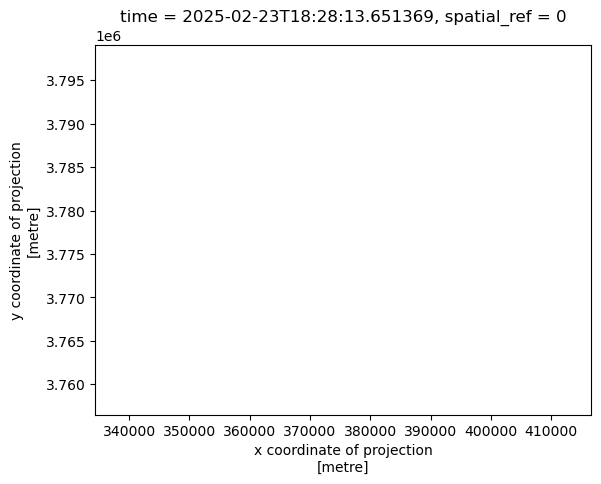

In [12]:
# True Color Map 1
# plot RGB as a numpy array
landsat[["red", "green", "blue"]].to_array().plot.imshow()

The map above displayed two warning messages. The first message pertained to how some RGB values are outside the allowed range to plot. The second message pertains to the NAN values within the landsat data. Python does not account for data that is outside the 0-255 byte range. 

**How to fix the warning messages:**

In order to fix the NAN warning, we need to fill the nan values with `.fillna(0)`. 

In order to fix the map, we need to adjust some parameters in the `.imshow()` argument. These inlcude the following:
- `robust= TRUE`: this ensures that the color limits are determined by the extreme values
- `vmin` and `vmax`: this defines the data range that the map, they represent darkness and brightness

In [13]:
# Check for NA values in bands
rgb_na = landsat[['red', 'green', 'blue']].to_array().isnull().sum() # use .isnull() and count how many there are with .sum()
rgb_na

<xarray.DataArray ()> Size: 8B
array(110)
Coordinates:
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0

Text(0.5, 1.0, 'Landsat 8 True Color RGB')

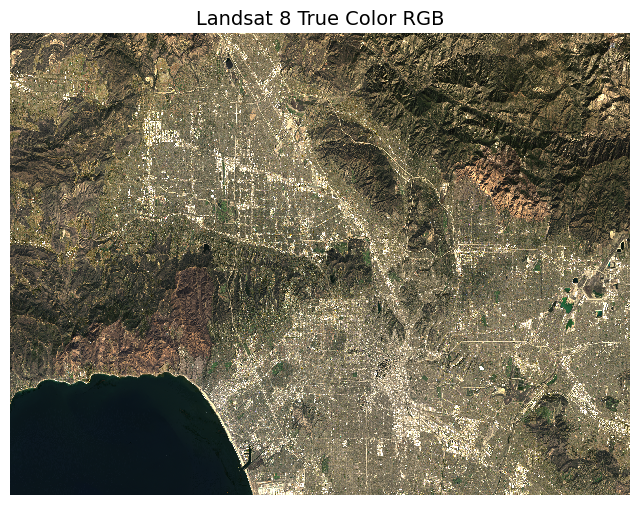

In [ ]:
# True color map 2
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 
ax.axis('off') # remove axes 
landsat[['red', 'green', 'blue']].to_array().fillna(0).plot.imshow( # add true colors data
        vmin= 7000, vmax=15200,  # adjust the darkness (vmin) and brightness (vmax) levels
        robust = True, # gets rid of outliers 
        ax=ax,
    )

ax.set_title("Landsat 8 True Color RGB", fontsize=14)
plt.show()

**Map 1 vs. Map 2** 

As you can see above, the first map failed to plot the landsat data. This was due to two main reasons: 1) outliers in the dataset and 2)NA values within the dataset. The second map was adjusted by filling in NA values with zero and adding adjusting for outliers with robust=true. 

### 7. False color image
In this section, I created two false color imagery maps of the region where the Palisades and Eaton fires were. False color imagery is the process of one wavelengths not visible to the human eye with visible wavelengths to depict details on an image you normally do not see (Riebeek, 2014). This is useful method for visualizing the impacts of fire on the land. For this map, I used *short-wave infared*, *near-infared*, and *red* bands to depict vegetation and burn scars on a map. 

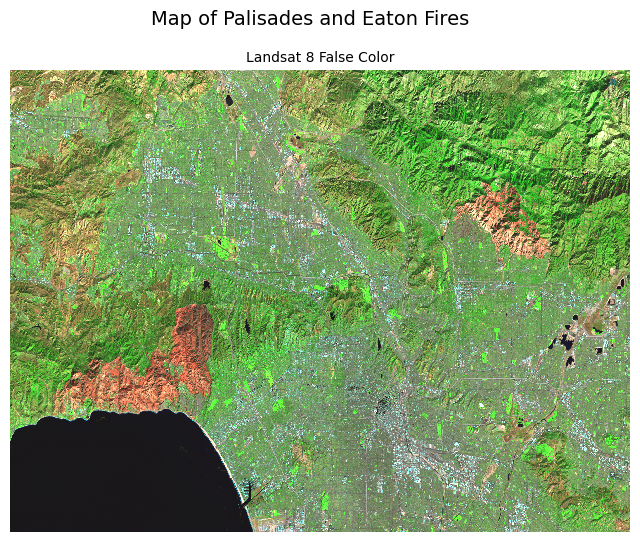

In [28]:
# Plot figure 
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 
ax.axis('off') # remove axes 

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow( # add false colors
    vmin= 6000, vmax=19000, # adjust the darkness (vmin) and brightness (vmax) levels
    robust = True, # remove outliers
    ax=ax,
)

fig.suptitle("Map of Palisades and Eaton Fires", fontsize = 14)
ax.set_title("Landsat 8 False Color", fontsize=10)

plt.show()

## 8.  False Color Map
In this section I will produce a false color map with the Palisades and Eaton fire perimeters. 

### CRS Matching 

Before adding the Eaton and Palisades fire perimeters to do the map, I need to transform the CRS of Eaton and Palisades to match the landsat data. This ensures that the fire perimeters are correctly placed *spatially* on the landsat map.

In [16]:
# Transform fire perimeters to match the CRS of landsat 
eaton_perim = eaton_perim.to_crs(landsat.rio.crs)
palisades_perim = palisades_perim.to_crs(landsat.rio.crs)

In [17]:
# Assert that the CRS of Eaton matches the CRS of Palisades
assert eaton_perim.crs == palisades_perim.crs 

In [18]:
# Assert that the CRS of Palisades matches the CRS of landsat 
assert landsat.rio.crs == palisades_perim.crs 

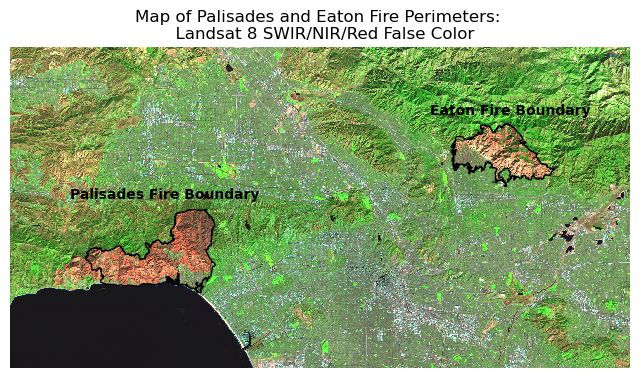

In [19]:
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 
ax.axis('off') # remove axes 

landsat[['swir22', 'nir08', 'red']].to_array().fillna(0).plot.imshow( # add landsat data
    vmin= 6000, vmax=19000, # adjust the darkness (vmin) and brightness (vmax) levels
    robust = True,
    ax=ax,
)
eaton_perim.plot(ax=ax, color = 'none', edgecolor = 'black', label = 'Eaton fire perimeter')
palisades_perim.plot(ax=ax, color = 'none', edgecolor = 'black', label = 'Palisades fire perimeter')

plt.figtext(x = .65,
            y = .65,
            s ="Eaton Fire Boundary",
            weight = 'bold')
plt.figtext(x = .2,
            y = .51,
            s ="Palisades Fire Boundary",
            weight = 'bold')
ax.set_title("Map of Palisades and Eaton Fire Perimeters: \n  Landsat 8 SWIR/NIR/Red False Color", fontsize=12)
plt.savefig('fire_map.png', dpi=300, transparent=True)


The map above is a false color map depicting the Palisades and Eaton fire boundaries. The map utilizes false color imagery, or a method for displaying wavelengths beyond the human eye's ability to see. Near infared (NIR) shows healhty vegetation and short-wave infared (SWIR) show recently burned regions.  Through this process of utilizing the near infared, short-wave infared, and red bands, we are able to see the lack of vegetation present within the Palisades and Eaton fire boundaries. 


## 9. Visualizing Fires with Socieconomic Data 
In this section I will perform a social dimensions analysis with the EJI data to view the impact of the Palisades and Eaton fires on 

In this section, I will perform the following: 
1. Spatial join of EJI data to fire perimeters.
2. Clip EJI data to match fire perimeters. 
3. Map EJI data to fire perimeters. 

Variables of interest:
- E_RENTER: Percentage of housing units that are renter occupied
- E_UNINSUR: Percentage of persons who are uninsured (i.e., have no health insurance)
- E_AGE65: Persons aged 65 and older
- E_PARK: proportion of green space

### 10. Spatial Joining
In order to view the socieconomic effects of the Palisades and Eaton fires, we need to join the fire perimeters with the EJI data. This is achieved through the process of *spatial joining*. 

Spatial join combines attributes from two dfs based on a spatial relationship (intersects). 

In order to join spatially join the EJI data with the fire perimeters, the CRS of both need to match. I can specify this within the `gpd.sjoin()` argument. 

In [20]:
# Spatially join EJI with Palisades fire perimeters
pali_eji = gpd.sjoin(eji_ca.to_crs(palisades_perim.crs),palisades_perim) 

Now I will view the spatial join. 

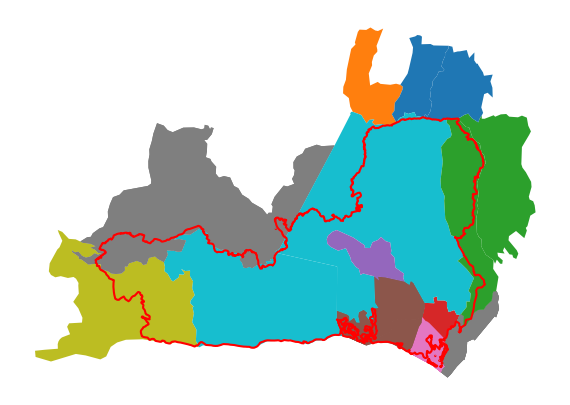

In [ ]:
# Exploratory graph: Palisades EJI spatial join
fig, ax = plt.subplots(figsize = (11,5)) # initialize figure
ax.axis('off') # remove axes 

pali_eji.plot('TRACTCE', # plot census tract from spatial join
              ax = ax)
# Add palisades perimeter 
palisades_perim.plot(ax = ax, 
                     color = 'none', 
                     edgecolor = 'red', 
                     linewidth= 1.5)

ax.set_title('')
plt.show() 

In [33]:
# Spatially join EJI with Eaton fire perimeters
eaton_eji = gpd.sjoin(eji_ca.to_crs(eaton_perim.crs),eaton_perim) 

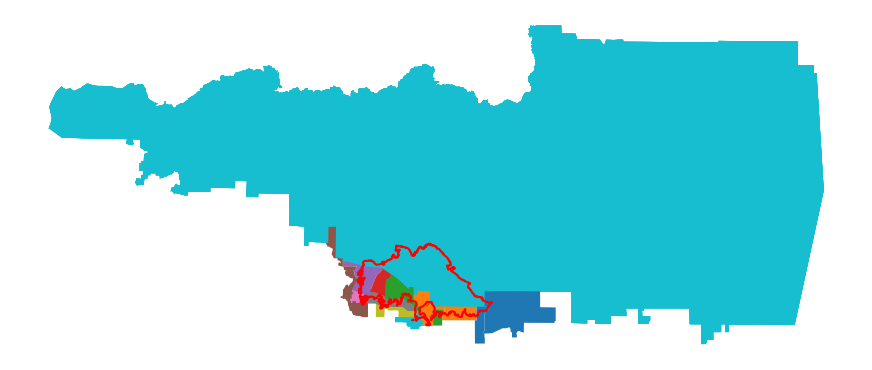

In [ ]:
# Exploratory graph: Eaton EJI spatial join
fig, ax = plt.subplots(figsize = (11,5)) # initialize figure
ax.axis('off') # remove axes 

eaton_eji.plot('TRACTCE', # plot census tract from spatial join
              ax = ax)
# Add eaton perimeter 
eaton_perim.plot(ax = ax, 
                     color = 'none', 
                     edgecolor = 'red', 
                     linewidth= 1.5)

ax.set_title('')
plt.show() 

You may notice that the *spatial join* product includes the full expanse census tracts (from EJI data) beyond the fire perimeters. This is because spatial joins will combines attributes from one layer to another. 


## 11. Polygon clipping
In order to fit the census tracts within the fire perimeters, I will perform *polygon clipping* with `gpd.clip()`. Clipping removes all features that fall outside a specified boundary, effectively trimming one dataset with another. 

In [36]:
# Change the CRS EJI to match palisades 
eji_ca = eji_ca.to_crs(palisades_perim.crs)

In [37]:
# Clip eji to palisades
palisades_clip = gpd.clip(eji_ca, palisades_perim)

In [38]:
# Clip eji to eaton
eaton_clip = gpd.clip(eji_ca, eaton_perim)

Now I will view the clipping result.

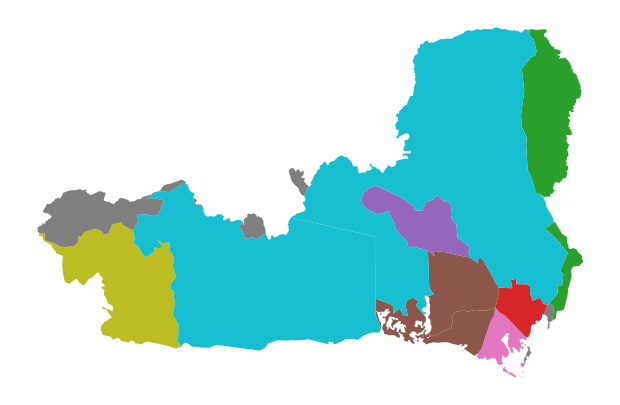

In [39]:
fig, ax = plt.subplots(figsize = (11,5)) # initialize figure
ax.axis('off') # remove axes 
palisades_clip.plot('TRACTCE', 
                    ax = ax )
plt.show()

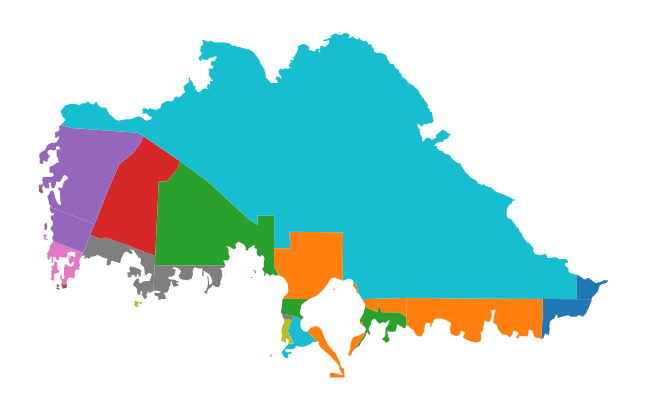

In [40]:
fig, ax = plt.subplots(figsize = (11,5)) # initialize figure
ax.axis('off') # remove axes 
eaton_clip.plot('TRACTCE', 
                    ax = ax )
plt.show()


## 12. Map EJI data to fire perimeters
In this section I will map the EJI variable `E_AGE65` (Persons aged 65 and older) to the fire perimeters.

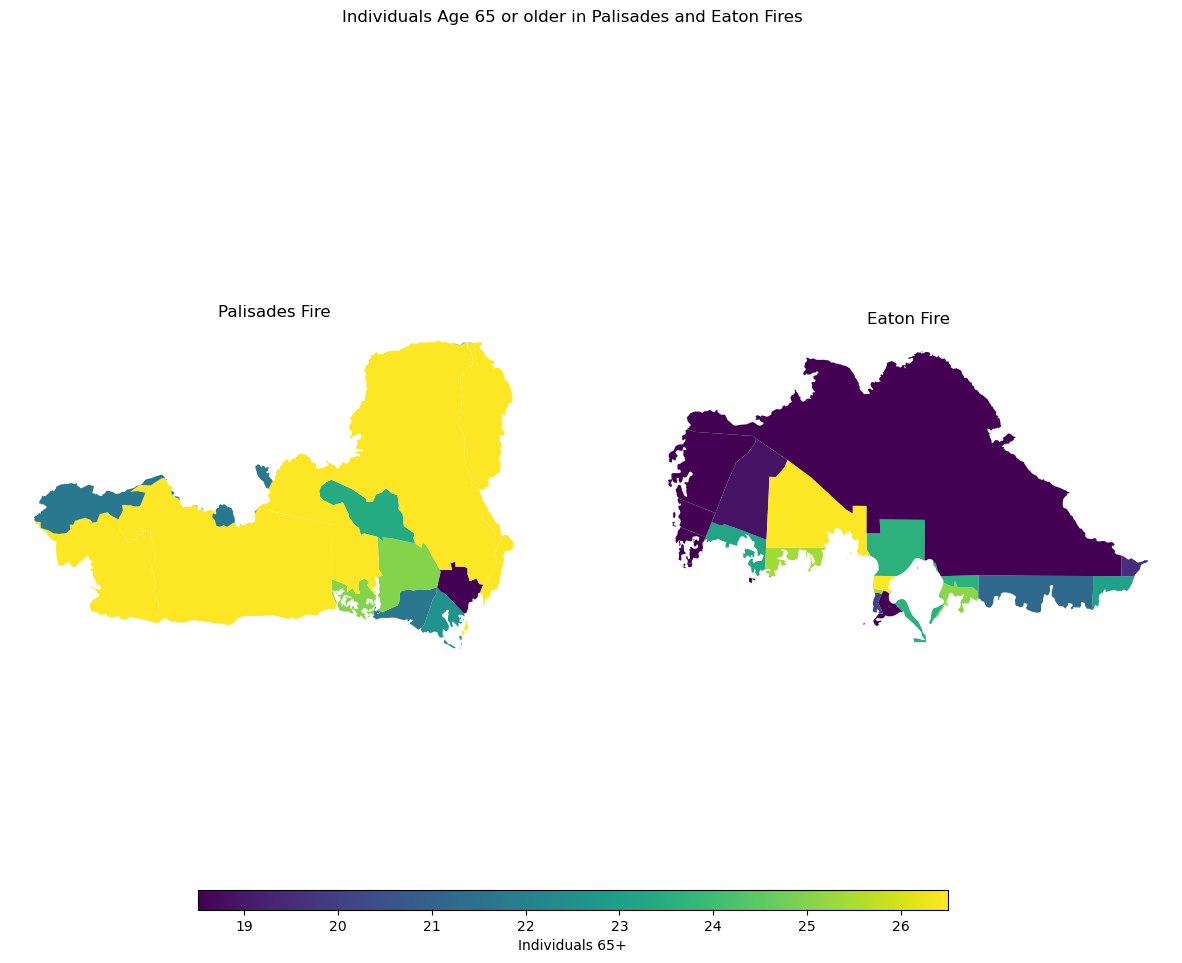

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'E_AGE65'

# Find common min/max for legend range
vmin = min(palisades_clip[eji_variable].min(), palisades_clip[eji_variable].min())
vmax = max(eaton_clip[eji_variable].max(), eaton_clip[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_clip.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades Fire')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Fire')
ax2.axis('off')

# Add overall title
fig.suptitle('Individuals Age 65 Or Older in Palisades and Eaton Fires')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Individuals 65+')

plt.show()

The map above shows the concentration of individuals aged 65 and older affected by the Palisades and Eaton fires. Certain areas within the fire perimeters have noticeably higher proportions of older adults. According to CBS News, approximately 21% of residents in the Eaton Fire zone and 26% of residents in the Palisades Fire zone were over the age of 65. This analysis resonates with me after watching numerous videos shared by local residents during the fires—stories of older adults losing homes filled with decades of memories were especially heartbreaking.



## Refrences 

Los Angeles County/ NIFC FIRIS. (2025). Palisades_and_Eaton_Dissolved_Fire_Perimeters [data file] Available: https://hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about [Date of Access: November 17 2025]

 U.S. Geological Survey. Landsat Collection 2 Level-2 Surface Reflectance (Microsoft Planetary Computer version)_[data file] Available: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2#overview [Date of Access: November 17 2025]

 Centers for Disease Control and Prevention and Agency for Toxic Substances Disease Registry. [Year] Environmental Justice Index. [Date of Access: November 21 2025]. https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html

 Riebeek, H. (2014, March 4). Why is that forest red and that cloud blue? NASA Earth Observatory. https://earthobservatory.nasa.gov/features/FalseColor 

 CBS News. (2025, March 18). Older L.A. wildfire victims struggle to pick up the pieces. CBS News. https://www.cbsnews.com/news/elderly-los-angeles-wildfire-victims/

 